# Project : Analyse AB Test Result
> Authored by: **Abhishek Pandey** [LinkedIn](https://www.linkedin.com/in/abhishekpandeyit/) | [Twitter](https://twitter.com/PandeyJii_)

## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, I am working to analyse the result of A/B test run by an e-commerce website.  In this notebook I am working to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

> ### Importing Important Libraries to work on the given data Set

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [3]:
"""Reading the dataset"""

df = pd.read_csv('F:/Github_repo/Analyze_ABTest_result/dataset-ab.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### To find the no. of rows in the Data Set using `df.shape[0]` where [0] represents rows

In [4]:
n_rows= df.shape[0]
n_rows

294478

### To find the number of unique users in the data set I am using `nunique()` function of the python and finding unique user with the help of user_id.

In [5]:
unique_users= df.user_id.nunique()
unique_users

290584

### The proportion of converted user:
> As in this data set converted users are marked by [1], so I am using only those rows which is marked as 1 in their "converted" column.
>
> Here I am using `df.query()` function to find the converted users.

In [6]:
proportion= df.query("converted == 1").shape[0]/n_rows
proportion

0.11965919355605512

### The number of times the `new_page` and `treatment` don't line up.

In [7]:
 """
 Number of rows, when group is not treatment but landing page is the new page
 """
grp_npage=df.query('group!="treatment" and landing_page=="new_page"').shape[0]

"""
 Number of rows, when group is not control but landing page is the old page
 """
grp_opage= df.query('group!="control" and landing_page=="old_page"').shape[0]

# summing both the grps

grp_sum=grp_npage+grp_opage
grp_sum


3893

### Checking if any column having missing values.

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

*** Above result clearly shows that this data set have no missing values***

In [9]:
# Creating a copy of the dataframe
df2=df

In [10]:
# dataframe where treatment is not aligned with new_page or control is not aligned with old_page 
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]

In [11]:
# Checking for unique User IDS
df2["user_id"].nunique()

290584

In [12]:
#Finding the duplicate User_ID
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

In [13]:
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
#Removing
df2 = df2.drop_duplicates()

In [15]:
# The probability of an individual converting given that an individual was in the control group
control_group = len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))
control_group

0.1203863045004612

In [16]:
# The probability of an individual converting given that an individual was in the treatment group
treatment_group = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
treatment_group

0.11880724790277405

In [17]:
# The probability of individual received new page
len(df2.query('landing_page=="new_page"'))/len(df2.index)

0.5000636646764286

> - Probability of individual converting given individual is in control group = **0.1203863045004612.**
> - Probability of individual converting given individual is in treatment group = **0.11880724790277405.**
>
> This Analysis gives a strong evidence that there isn't any further conversion between new page and old page.
> Since the conversion Probability of both are nearly same, then it is neccessary to analyse other factors too.

### Part II - A/B Test

In [18]:
p_new = len(df2.query( 'converted==1'))/len(df2.index)
p_new

0.11959667567149027

In [19]:
# Conversion rate for p_old under null.
p_old = len(df2.query('converted==1'))/len(df2.index)
p_old

0.11959667567149027

In [20]:
# probablity under null
p=np.mean([p_old,p_new])
p

0.11959667567149027

In [21]:
# difference of p_new and p_old
p_diff=p_new-p_old

In [22]:
#calculating the value of n_new
n_new = len(df2.query('landing_page=="new_page"'))
n_new

145311

In [23]:
#calculating the value of n_old
n_old = len(df2.query('landing_page=="old_page"'))
n_old

145274

In [24]:
## simulate n_old transactions with a convert rate of p_new under the null
new_page_converted = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])

In [25]:
# simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])

In [26]:
# differences computed in from p_new and p_old
obs_diff= new_page_converted.mean() - old_page_converted.mean()# differences computed in from p_new and p_old
obs_diff

0.0008014194200020031

In [27]:
# Create sampling distribution for difference in p_new-p_old simulated values
# with boostrapping
p_diffs = []
for i in range(10000):
    
    # 1st parameter dictates the choices you want.  In this case [1, 0]
    p_new1 = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    p_old1 = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_new2 = p_new1.mean()
    p_old2 = p_old1.mean()
    p_diffs.append(p_new2-p_old2)
#_p_diffs = np.array(_p_diffs)

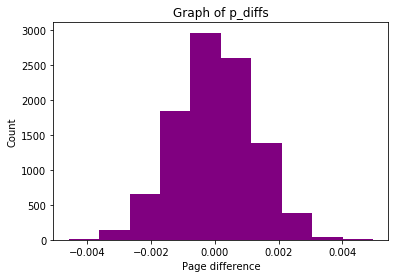

In [28]:
p_diffs=np.array(p_diffs)
#histogram of p_diff
plt.hist(p_diffs, color='purple')
plt.title('Graph of p_diffs')#title of graphs
plt.xlabel('Page difference') # x-label of graphs
plt.ylabel('Count'); # y-label of graphs

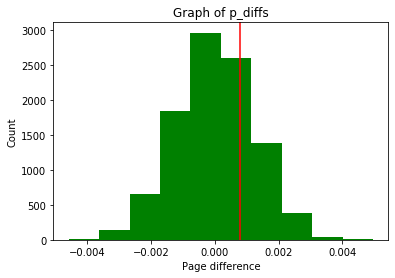

In [29]:
#histogram of p_diff
plt.hist(p_diffs, color='green');

plt.title('Graph of p_diffs') #title of graphs
plt.xlabel('Page difference') # x-label of graphs
plt.ylabel('Count') # y-label of graphs

plt.axvline(x= obs_diff, color='r');

### What proportion of the **p_diffs** are greater than the actual difference observed in **dataset-ab.csv**?

In [30]:
var1 = df2[df2['landing_page'] == 'new_page']
var1=var1['converted'].mean()
var2 = df2[df2['landing_page'] == 'old_page']
var2 = var2['converted'].mean()
actual_diff = var1-var2
count = 0
for i in p_diffs:
    if i> actual_diff:
        count = count+1
        
print (count/(len(p_diffs)))

0.903


> Above calculation of p-value is almost ***90%*** of the population is above the real diffrence which suggested that, the new-page is not doing significantly better than the old page. Therefore we should stick to the null hyposthesis as p-value is very large.

In [31]:
import statsmodels.api as sm

convert_old = len(df2.query('converted==1 and landing_page=="old_page"')) #rows converted with old_page
convert_new = len(df2.query('converted==1 and landing_page=="new_page"')) #rows converted with new_page
n_old = len(df2.query('landing_page=="old_page"')) #rows_associated with old_page
n_new = len(df2.query('landing_page=="new_page"')) #rows associated with new_page
n_new

145311

In [32]:
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 

#display z_score and p_value
print(z_score,p_value)

1.3116075339133115 0.905173705140591


In [33]:
from scipy.stats import norm
norm.cdf(z_score) #how significant our z_score is

0.905173705140591

In [34]:
norm.ppf(1-(0.05)) #critical value of 95% confidence

1.6448536269514722

## Working on Logistic Regression

In [35]:
#adding an intercept column
df2['intercept'] = 1

#Create dummy variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [36]:
import statsmodels.api as sm
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model.fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:               8.085e-06
Time:                        11:45:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [38]:
# Reading the dataset-countries
countries = pd.read_csv('dataset-countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
#Using inner join to join two dates
new = countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [40]:
#adding dummy variables with 'CA' as the baseline
new[['US', 'UK']] = pd.get_dummies(new['country'])[['US', "UK"]]
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0


In [41]:
new['US_ab_page'] = new['US']*new['ab_page']
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0,1


In [42]:
new['UK_ab_page'] = new['UK']*new['ab_page']
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0,1,0


In [43]:
logit3 = sm.Logit(new['converted'], new[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'US_ab_page']])
logit3

In [44]:
#Check the result
result3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.366111
         Iterations 6


In [45]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:               2.590e-05
Time:                        11:45:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2388
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0366      0.028    -72.618      0.000      -2.092      -1.982
ab_page       -0.0018      0.021     -0.086      0.931      -0.043       0.039
US             0.0501      0.030      1.691      0.091      -0.008       0.108
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US_ab_page    -0.0094   2.37e+06  -3.96e-09      1.000   -4.64e+06    4.64e+06
US_ab_page    -0.0094   2.37e+06  -3.96e-09      1.000   -4.64e+06    4.64e+06
==============================================================================
"""

**Final Analysis** 
> - None of the variables have significant p-values thus we're unable to counter the null values.
> - There isn't sufficient evidence to suggest that there is an interaction between country and page received, so we can't predict that whether a user converts or not.
> - There isn't any strong evidence that the new page results in more conversions in comparision with the old page.